In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from datetime import datetime , timedelta
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
import ast
import joblib

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.isnull().sum()

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

<Axes: xlabel='user/gender'>

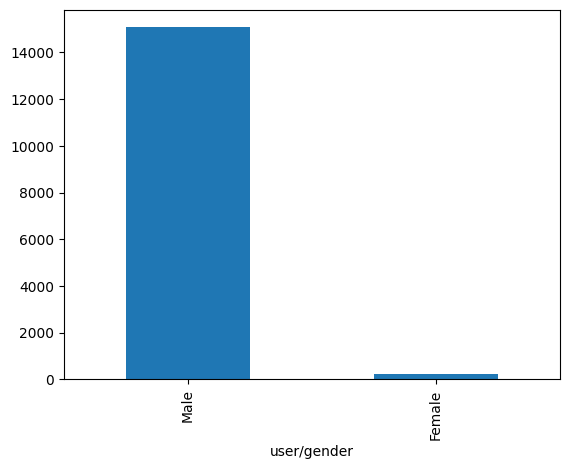

In [5]:
#Check the which gender consume more liquor
data["user/gender"].value_counts().plot(kind="bar")

In [6]:
def get_wday(time):
    return time["wday"]

In [7]:
data['review/timeStruct'] = data['review/timeStruct'].apply(ast.literal_eval)

In [11]:
data["review/timeStruct"][0]

{'min': 38,
 'hour': 3,
 'mday': 16,
 'sec': 10,
 'year': 2008,
 'wday': 1,
 'mon': 12,
 'isdst': 0,
 'yday': 351}

In [9]:
data["wday"] = data['review/timeStruct'].apply(get_wday)

In [13]:
data["hour"]=data["review/timeStruct"].apply(lambda x : x["hour"])

In [15]:
data["mon"]=data["review/timeStruct"].apply(lambda x : x["mon"])

In [16]:
# maximum num of gender review is male and female is very less we fill null value with male
data["user/gender"]=data["user/gender"].fillna("Male")

In [17]:
#.fill null column of review/text with =""
data["review/text"]=data["review/text"].fillna("")

In [18]:
data.isna().sum()

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text              0
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender              0
user/profileName         5
wday                     0
hour                     0
mon                      0
dtype: int64

In [19]:
def time_(timestamp):
    hr=timestamp["hour"]
    if hr>6 and hr<12:
        return "Morning"
    elif hr>12 and hr<17:
        return "Afternoon"
    else:
        return "Evening"

In [20]:
# for defining on which season user give review
def season(timestamp):
    month=timestamp["mon"]
    if month>2 and month<6:
        return "Summer"
    elif month>6 and month<9:
        return "Rainy"
    else:
        return "Winter"

In [ ]:
# here we create a new column for at which time user give review
data["time"]=data["date_ist"].apply(time_)

In [ ]:
# Here we create new column "season" at which season user give review 
data["season"]=data["date_ist"].apply(season)

In [ ]:
data["season"].value_counts().plot(kind="bar")

In [ ]:
data["time"].value_counts().plot(kind="bar")

In [21]:
# create a function to convert review into num or rating
def review_function(text):
    polarity=TextBlob(text).sentiment.polarity
    if polarity <= -0.5:
        return 1 
    elif -0.5 < polarity <= 0:
        return 2  
    elif 0 < polarity <= 0.5:
        return 3  
    elif 0.5 < polarity <= 0.8:
        return 4 
    else:
        return 5

In [22]:
data["review_num"]=data["review/text"].apply(review_function)

In [ ]:
data["review_num"].value_counts().plot(kind="bar")

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37500 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

In [ ]:
beer_style_encoder=LabelEncoder()

In [ ]:
# we take below column to train our model
# "beer/ABV" , "beer/beerId" ,"beer/brewerId","beer/style","review/appearance","review/aroma","review/palate","review/taste","time","season"

In [24]:
label_encoder_dict={}
for i in ["beer/style"]:
    lable=LabelEncoder()
    data[i]=lable.fit_transform(data[i])
    label_encoder_dict[i]=lable

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  int64  
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37500 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

In [26]:
x=data.loc[:,["beer/ABV","beer/beerId","beer/brewerId","beer/style","review/appearance","review/aroma","review/palate","review/taste","hour","mon","wday"]]

In [28]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   beer/ABV           37500 non-null  float64
 1   beer/beerId        37500 non-null  int64  
 2   beer/brewerId      37500 non-null  int64  
 3   beer/style         37500 non-null  int64  
 4   review/appearance  37500 non-null  float64
 5   review/aroma       37500 non-null  float64
 6   review/palate      37500 non-null  float64
 7   review/taste       37500 non-null  float64
 8   hour               37500 non-null  int64  
 9   mon                37500 non-null  int64  
 10  wday               37500 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 3.1 MB


In [29]:
y=data["review/overall"]

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [45]:
model_rf=RandomForestRegressor(random_state=42,n_estimators=500,max_depth=10,min_samples_leaf=1,min_samples_split=5,max_features="log2")
model_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features='log2', min_samples_split=5,
                      n_estimators=500, random_state=42)

In [46]:
y_pred_rf=model_rf.predict(x_test)

In [73]:
joblib.dump(model_rf, 'model_random_forest.pkl')

print("Model saved successfully!")

Model saved successfully!


In [47]:
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE", root_mean_squared_error(y_test,y_pred_rf))
print("R2 Score",r2_score(y_test,y_pred_rf))

MAE: 0.3032635967621541
MSE: 0.1592688306893398
RMSE 0.39908499181169393
R2 Score 0.6631417122636356


In [49]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Define parameter grid
param_dist = {
    'n_estimators': [],
    'max_depth': [10,12,15],
    'max_features': ['log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Random search
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)
random_search.fit(x_train, y_train)

# Best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best MSE:", -random_search.best_score_)


Best parameters: {'n_estimators': 410, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 12}
Best MSE: 0.15864793778295647


In [57]:
from sklearn.linear_model import LinearRegression

In [60]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [74]:
joblib.dump(lr_model, 'Linear_regressor.pkl')
print("Model saved successfully!")

Model saved successfully!


In [75]:
y_pred_lr=lr_model.predict(x_test)

In [76]:
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE", root_mean_squared_error(y_test,y_pred_lr))
print("R2 Score",r2_score(y_test,y_pred_lr))

MAE: 0.3032828239529926
MSE: 0.16271812002617958
RMSE 0.40338334128491177
R2 Score 0.6558463632936822


In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_knn=scaler.fit_transform(x_train)
x_test_knn=scaler.transform(x_test)

In [68]:
#uuse KNeighborsRegressor
param_grid = {
    'n_neighbors': [20,30,35,40,45,50],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(x_train_knn, y_train)
best_knn = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
y_pred_knn = best_knn.predict(x_test_knn)

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'distance'}


In [77]:
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
print("MSE:", mean_squared_error(y_test, y_pred_knn))
print("RMSE", root_mean_squared_error(y_test,y_pred_knn))
print("R2 Score",r2_score(y_test,y_pred_knn))

MAE: 0.3185593604143378
MSE: 0.1744450826136787
RMSE 0.41766623350910076
R2 Score 0.6310434905628677


In [78]:
joblib.dump(best_knn, 'KNeighborsRegressor.pkl')
print("Model saved successfully!")

Model saved successfully!


In [107]:
# use LGBMRegressor Model
lgbm_model = LGBMRegressor(n_estimators=150, learning_rate=0.1, max_depth=10, random_state=42,force_row_wise=True)
lgbm_model.fit(x_train, y_train)

[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 30000, number of used features: 11
[LightGBM] [Info] Start training from score 3.886750


LGBMRegressor(force_row_wise=True, max_depth=10, n_estimators=150,
              random_state=42)

In [ ]:
y_pred_lgbm = lgbm_model.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred_lgbm))
print("MSE:", mean_squared_error(y_test, y_pred_lgbm))
print("RMSE", root_mean_squared_error(y_test,y_pred_lgbm))
print("R2 Score",r2_score(y_test,y_pred_lgbm))

In [93]:
joblib.dump(lgbm_model, 'LGBMRegressor.pkl')
print("Model saved successfully!")

Model saved successfully!


In [104]:
# use Ridge Model
ridge = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 0.5,1,1.5,2,2.5,5,8]}
ridge_grid_search = GridSearchCV(ridge, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(x_train, y_train)
best_ridge = ridge_grid_search.best_estimator_
print("Best Ridge Parameters:", ridge_grid_search.best_params_)

Best Ridge Parameters: {'alpha': 1.5}


In [105]:
y_pred_ridge=best_ridge.predict(x_test)

In [106]:
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("RMSE", root_mean_squared_error(y_test,y_pred_ridge))
print("R2 Score",r2_score(y_test,y_pred_ridge))

MAE: 0.30328240235249565
MSE: 0.1627159956264549
RMSE 0.40338070804942433
R2 Score 0.6558508564619352


In [100]:
import joblib
joblib.dump(best_ridge, 'ridge.pkl')

['ridge.pkl']

In [103]:
y_pred_lasso=best_lasso.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("RMSE", root_mean_squared_error(y_test,y_pred_lasso))
print("R2 Score",r2_score(y_test,y_pred_lasso))

MAE: 0.3347664773421134
MSE: 0.19072707569973532
RMSE 0.4367231110208565
R2 Score 0.5966065935996285
